In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.utils.data as Data
import matplotlib.pyplot as plt

In [2]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001


In [3]:
train_dataset = dsets.MNIST(root='./data', train=True, 
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data', train=False,
                          transform=transforms.ToTensor())



/home/jerry/workshop/virtualenv/alpha-mind/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/jerry/workshop/virtualenv/alpha-mind/lib/python3.6/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


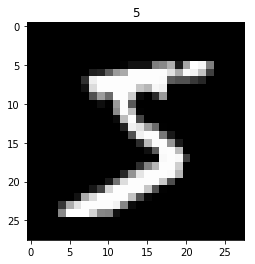

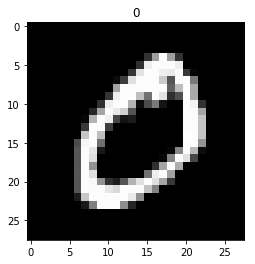

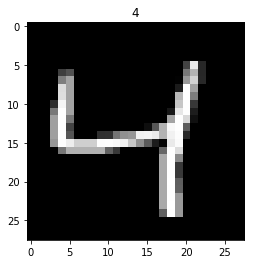

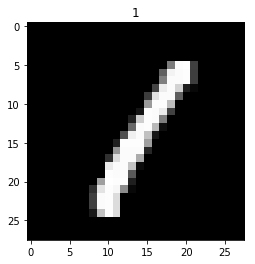

In [4]:
for i in range(4):
    plt.imshow(train_dataset.train_data[i].numpy(), cmap='gray')
    plt.title('%i' % train_dataset.test_labels[i])

    plt.show()

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    

In [7]:
net = Net(input_size, hidden_size, num_classes)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [9]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = net(images)
        
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Rpoch [%d/%d], Step [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, i+1, len(train_loader)/batch_size, loss.data))
    correct = 0
    total = 0
    for test_images, test_labels in test_loader:
        test_images = Variable(images.view(-1, 28*28))
        outputs  = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += test_labels.size(0)
        correct += (predicted == test_labels).sum()
    print('Acc of the network: %s %%'% (100 * correct /total))

Rpoch [1/5], Step [100/6], Loss: 0.2900
Rpoch [1/5], Step [200/6], Loss: 0.3093
Rpoch [1/5], Step [300/6], Loss: 0.2884
Rpoch [1/5], Step [400/6], Loss: 0.1957
Rpoch [1/5], Step [500/6], Loss: 0.2162
Rpoch [1/5], Step [600/6], Loss: 0.1227
Acc of the network: tensor(10) %
Rpoch [2/5], Step [100/6], Loss: 0.2976
Rpoch [2/5], Step [200/6], Loss: 0.0771
Rpoch [2/5], Step [300/6], Loss: 0.1475
Rpoch [2/5], Step [400/6], Loss: 0.0842
Rpoch [2/5], Step [500/6], Loss: 0.0525
Rpoch [2/5], Step [600/6], Loss: 0.0756
Acc of the network: tensor(9) %
Rpoch [3/5], Step [100/6], Loss: 0.0872
Rpoch [3/5], Step [200/6], Loss: 0.0399
Rpoch [3/5], Step [300/6], Loss: 0.1550
Rpoch [3/5], Step [400/6], Loss: 0.0996
Rpoch [3/5], Step [500/6], Loss: 0.0640
Rpoch [3/5], Step [600/6], Loss: 0.0549
Acc of the network: tensor(9) %
Rpoch [4/5], Step [100/6], Loss: 0.0284
Rpoch [4/5], Step [200/6], Loss: 0.0304
Rpoch [4/5], Step [300/6], Loss: 0.0602
Rpoch [4/5], Step [400/6], Loss: 0.1319
Rpoch [4/5], Step [500/

In [10]:
test_output = net(test_images[:20])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print('prediction numbe', pred_y)
print('real number', test_labels[:20].numpy())

prediction numbe [7 6 0 9 3 2 7 7 6 7 6 1 9 1 3 2 8 4 5 4]
real number [8 9 0 1 2 3 4 5 6 7 8 0 1 2 3 4 7 8 9 7]
